# Analysis for salmon trap data in the Dungenesss River from 2005
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2005, the counts for both wild and hatchery are together with an additional column for wild fish except for Chinook0. In 2005, there were no hatchery chinook0 released. For all other years, counts for wild and hatchery fish are separate.



In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [3]:
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name ='2005',
    header = [3,4]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
print(columns)
df_year.columns = df_year.columns.droplevel(level=1)
df_year.rename(columns = {
    'Unnamed: 0_level_0':'Down',
    'Unnamed: 1_level_0':'Up',
    'Unnamed: 2_level_0':'In',
    'Unnamed: 3_level_0':'Out',
    'Coho 1+ ':'Coho 1+'
}, inplace = True)
print(df_year.columns)

[('Unnamed: 0_level_0', 'Down'), ('Unnamed: 1_level_0', 'Up'), ('Unnamed: 2_level_0', 'In'), ('Unnamed: 3_level_0', 'Out'), ('Chinook 0+', 10), ('Chinook 1+', 11), ('Chum', 20), ('Coho 0+', 40), ('Coho 1+ ', 41), ('Pink', 30), ('Sockeye', 50), ('Trout parr', 65), ('Steelhead smolts', 71), ('Cutthroat smolts', 61), ('Chinook 1+ CWT hatchery', '11\\30'), ('Coho 1+ UC mark Wild', '41\\08'), ('Coho 1+ LC mark Wild', '41\\09'), ('Coho 1+ Hatchery ad-mark', '41\\13'), ('Coho 1+ hatchery CWT not ad-marked', '41\\30'), ('Cutthroat parr unmark wild', '60\\0'), ('Cutthroat adult unmark wild', '62\\0'), ('Steelhead parr unmark wild', '70\\0'), ('Steelhead smolt UC mark wild', '71\\08'), ('Steelhead hatchery ad-mark', '71\\13'), ('Steelhead adult unmark wild', '73\\0'), ('Dolly Varden / Bull trout parr unmark wild', '90\\0'), ('Dolly Varden / Bull trout smolt unmark wild', '91\\0')]
Index(['Down', 'Up', 'In', 'Out', 'Chinook 0+', 'Chinook 1+', 'Chum',
       'Coho 0+', 'Coho 1+', 'Pink', 'Sockeye'

In [4]:
#making new columns
df_year['Date'] = df_year['Down'].dt.date
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

,Down,Up,In,Out,Chinook 0+,Chinook 1+,Chum,Coho 0+,Coho 1+,Pink,Sockeye,Trout parr,Steelhead smolts,Cutthroat smolts,Chinook 1+ CWT hatchery,Coho 1+ UC mark Wild,Coho 1+ LC mark Wild,Coho 1+ Hatchery ad-mark,Coho 1+ hatchery CWT not ad-marked,Cutthroat parr unmark wild,Cutthroat adult unmark wild,Steelhead parr unmark wild,Steelhead smolt UC mark wild,Steelhead hatchery ad-mark,Steelhead adult unmark wild,Dolly Varden / Bull trout parr unmark wild,Dolly Varden / Bull trout smolt unmark wild,Date,midpoint
0,2005-03-08 16:30:00,2005-03-09 12:14:00,19.733333,0.0,86.0,0.0,268.0,0.0,0.0,106.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2005-03-08,2005-03-09 02:22:00
2,2005-03-09 13:06:00,2005-03-09 18:20:00,5.233333,0.0,1.0,0.0,30.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-09,2005-03-09 15:43:00
3,2005-03-09 18:20:00,2005-03-09 20:13:00,1.883333,0.0,7.0,0.0,165.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-09,2005-03-09 19:16:30
4,2005-03-09 20:13:00,2005-03-10 08:41:00,12.466667,0.0,53.0,0.0,599.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-09,2005-03-10 02:27:00
5,2005-03-10 08:41:00,2005-03-10 17:47:00,9.100000,0.0,1.0,0.0,34.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2005-03-10,2005-03-10 13:14:00
6,2005-03-10 17:47:00,2005-03-11 07:59:00,14.200000,0.0,24.0,0.0,528.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-10,2005-03-11 00:53:00
7,2005-03-11 07:59:00,2005-03-11 15:45:00,7.766667,0.0,11.0,0.0,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-11,2005-03-11 11:52:00
8,2005-03-11 15:45:00,2005-03-11 19:18:00,3.550000,0.0,8.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-11,2005-03-11 17:31:30
9,2005-03-11 19:18:00,2005-03-12 08:15:00,12.950000,0.0,100.0,0.0,972.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-11,2005-03-12 01:46:30
10,2005-03-12 08:15:00,2005-03-12 18:06:00,9.850000,0.0,1.0,0.0,9.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-12,2005-03-12 13:10:30


In [17]:
#getting temperature data
#reading html data
year = "2005"
url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()

text = text[131:]
text_flow = text_flow[119:]

In [18]:
df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])

df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_trial = df_year.dropna(subset = ['midpoint'])
df_year_trial = df_year_trial.sort_values("midpoint")
df_year_temp = pd.merge_asof(df_year_trial,df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Down,Up,In,Out,Chinook 0+,Chinook 1+,Chum,Coho 0+,Coho 1+,Pink,Sockeye,Trout parr,Steelhead smolts,Cutthroat smolts,Chinook 1+ CWT hatchery,Coho 1+ UC mark Wild,Coho 1+ LC mark Wild,Coho 1+ Hatchery ad-mark,Coho 1+ hatchery CWT not ad-marked,Cutthroat parr unmark wild,Cutthroat adult unmark wild,Steelhead parr unmark wild,Steelhead smolt UC mark wild,Steelhead hatchery ad-mark,Steelhead adult unmark wild,Dolly Varden / Bull trout parr unmark wild,Dolly Varden / Bull trout smolt unmark wild,Date,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2005-03-08 16:30:00,2005-03-09 12:14:00,19.733333,0.0,86.0,0.0,268.0,0.0,0.0,106.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2005-03-08,2005-03-09 02:22:00,03/09/2005,02:15,7.0,140.0,03/09/2005,02:15,154.0,2.0
1,2005-03-09 13:06:00,2005-03-09 18:20:00,5.233333,0.0,1.0,0.0,30.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-09,2005-03-09 15:43:00,03/09/2005,15:30,8.8,140.0,03/09/2005,15:30,177.0,2.0
2,2005-03-09 18:20:00,2005-03-09 20:13:00,1.883333,0.0,7.0,0.0,165.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-09,2005-03-09 19:16:30,03/09/2005,19:15,7.9,140.0,03/09/2005,19:15,180.0,2.0
3,2005-03-09 20:13:00,2005-03-10 08:41:00,12.466667,0.0,53.0,0.0,599.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-09,2005-03-10 02:27:00,03/10/2005,02:15,6.7,140.0,03/10/2005,02:15,181.0,2.0
4,2005-03-10 08:41:00,2005-03-10 17:47:00,9.100000,0.0,1.0,0.0,34.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2005-03-10,2005-03-10 13:14:00,03/10/2005,13:00,7.6,140.0,03/10/2005,13:00,179.0,2.0
5,2005-03-10 17:47:00,2005-03-11 07:59:00,14.200000,0.0,24.0,0.0,528.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-10,2005-03-11 00:53:00,03/11/2005,00:45,6.8,140.0,03/11/2005,00:45,171.0,2.0
6,2005-03-11 07:59:00,2005-03-11 15:45:00,7.766667,0.0,11.0,0.0,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-11,2005-03-11 11:52:00,03/11/2005,11:45,7.3,140.0,03/11/2005,11:45,173.0,2.0
7,2005-03-11 15:45:00,2005-03-11 19:18:00,3.550000,0.0,8.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-11,2005-03-11 17:31:30,03/11/2005,17:30,8.1,140.0,03/11/2005,17:30,169.0,2.0
8,2005-03-11 19:18:00,2005-03-12 08:15:00,12.950000,0.0,100.0,0.0,972.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-11,2005-03-12 01:46:30,03/12/2005,01:45,6.6,140.0,03/12/2005,01:45,166.0,2.0
9,2005-03-12 08:15:00,2005-03-12 18:06:00,9.850000,0.0,1.0,0.0,9.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-03-12,2005-03-12 13:10:30,03/12/2005,13:00,8.2,140.0,03/12/2005,13:00,171.0,2.0


In [19]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook 0+':'Chinook0_Wild',
                                                      'Chinook 1+':'Chinook1_Total',
                                                      'Coho 0+':'Coho0_Total',
                                                      'Coho 1+':'Coho1_Total',
                                                      'Steelhead smolts':'Steelhead1_Total',
                                                      'Chinook 1+ CWT hatchery':'Chinook1_Hat',
                                                      'Coho 1+ UC mark Wild':'Coho1_Wild',
                                                      'Coho 1+ LC mark Wild':'Coho1_Wild1',
                                                      'Coho 1+ Hatchery ad-mark':'Coho1_Hat',
                                                      'Coho 1+ hatchery CWT not ad-marked':'Coho1_Hat1',                                                       
                                                      'Steelhead smolt UC mark wild':'Steelhead1_Wild',
                                                      'Steelhead hatchery ad-mark':'Steelhead1_Hat'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                                                   'Out':'sum',
                                                                   'Chinook0_Wild':'sum',
                                                                   'Chinook1_Total':'sum',
                                                                   'Chinook1_Hat':'sum',
                                                                   'Coho1_Total':'sum',
                                                                   'Coho1_Hat':'sum',
                                                                   'Coho1_Hat1':'sum',
                                                                   'Coho1_Wild':'sum',
                                                                   'Coho1_Wild1':'sum',
                                                                   'Steelhead1_Total':'sum',
                                                                   'Steelhead1_Wild':'sum',
                                                                   'Steelhead1_Hat':'sum',
                                                                   'temp':'mean',
                                                                   'flow':'mean'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)

,In,Out,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Hat,temp,flow
Date,,,,,,,,,,,,,,,
2005-03-08,19.733333,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,154.000000
2005-03-09,19.583333,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.800000,179.333333
2005-03-10,23.300000,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.200000,175.000000
2005-03-11,24.266667,0.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.333333,169.333333
2005-03-12,22.866667,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.150000,168.000000
2005-03-13,24.466667,0.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.450000,158.500000
2005-03-14,24.416667,0.0,162.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.650000,151.500000
2005-03-15,22.900000,0.0,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.200000,145.333333
2005-03-16,24.366667,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.200000,149.500000


In [50]:
#calculate fish per hour
#chinook 0
#only chinook wild counts for year 2005
#groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
#groupedby_dates_year['chinook0_hatchery_perhour'] = (
#    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (
    groupedby_dates_year['Chinook1_Hat']  )/groupedby_dates_year['In']
groupedby_dates_year['Chinook1_Wild'] = (groupedby_dates_year['Chinook1_Total'] - groupedby_dates_year['Chinook1_Hat'])
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['Coho1_Wild2'] = groupedby_dates_year['Coho1_Total'] - (groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'])
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1']+groupedby_dates_year['Coho1_Wild2'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = (
    groupedby_dates_year['Steelhead1_Hat'])/groupedby_dates_year['In']
groupedby_dates_year['Steelhead1_Wild1'] = groupedby_dates_year['Steelhead1_Total'] - groupedby_dates_year['Steelhead1_Hat']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']


In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)

,In,Out,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Hat,temp,flow,chinook0_wild_perhour,chinook1_perhour,chinook1_hatchery_perhour,Chinook1_Wild,chinook1_wild_perhour,coho1_perhour,coho1_hatchery_perhour,Coho1_Wild2,coho1_wild_perhour,steelheadsmolt_perhour,steelheadsmolt_hatchery_perhour,Steelhead1_Wild1,steelheadsmolt_wild_perhour
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-03-08,19.733333,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,154.000000,4.358108,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2005-03-09,19.583333,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.800000,179.333333,3.114894,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2005-03-10,23.300000,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.200000,175.000000,1.072961,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2005-03-11,24.266667,0.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.333333,169.333333,4.903846,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2005-03-12,22.866667,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.150000,168.000000,3.979592,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2005-03-13,24.466667,0.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.450000,158.500000,5.190736,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2005-03-14,24.416667,0.0,162.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.650000,151.500000,6.634812,0.000000,0.000000,0.0,0.000000,0.040956,0.000000,1.0,0.040956,0.000000,0.000000,0.0,0.000000
2005-03-15,22.900000,0.0,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.200000,145.333333,2.052402,0.000000,0.000000,0.0,0.000000,0.043668,0.000000,1.0,0.043668,0.000000,0.000000,0.0,0.000000
2005-03-16,24.366667,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.200000,149.500000,8.413133,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [52]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

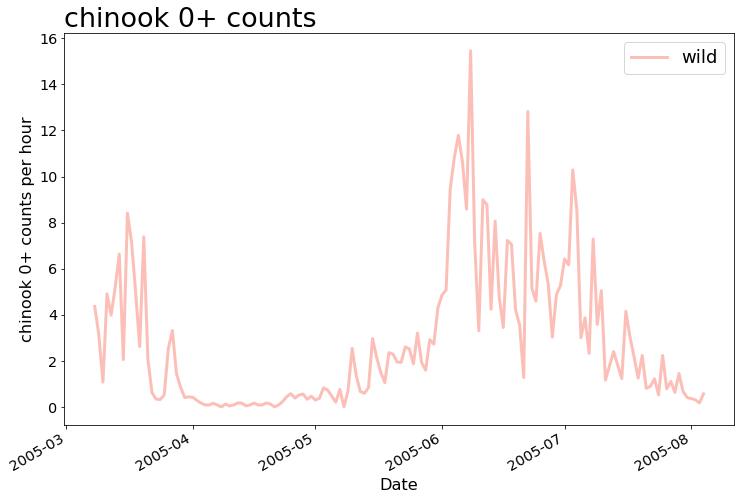

In [53]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["wild"])

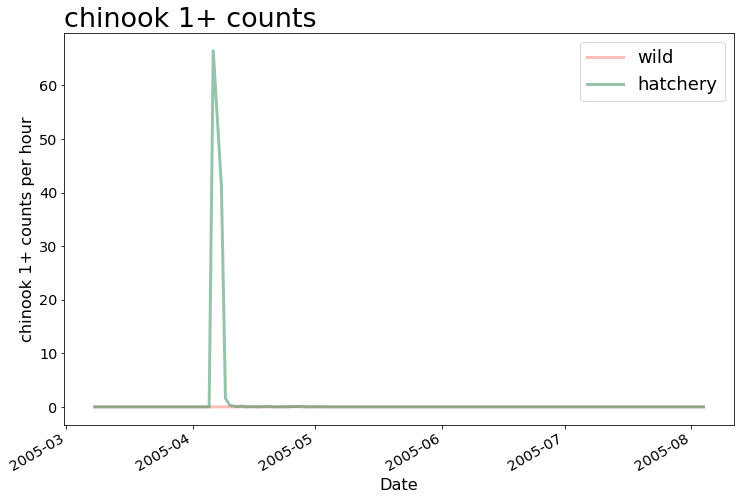

In [58]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["wild","hatchery"])

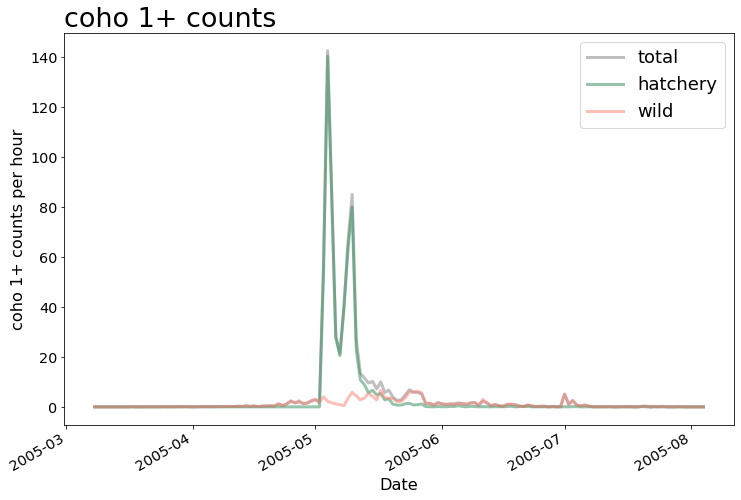

In [57]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","hatchery","wild"])

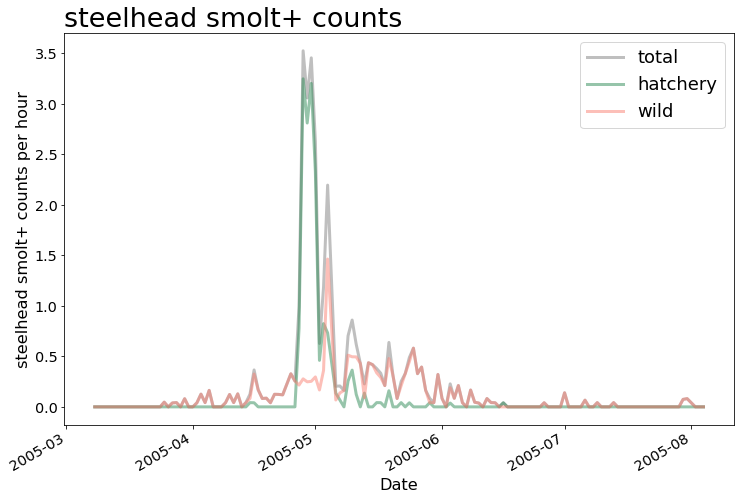

In [60]:
#steelhead1
plot_fish_perhour(groupedby_dates_year,"steelhead","smolt",["total","hatchery","wild"])

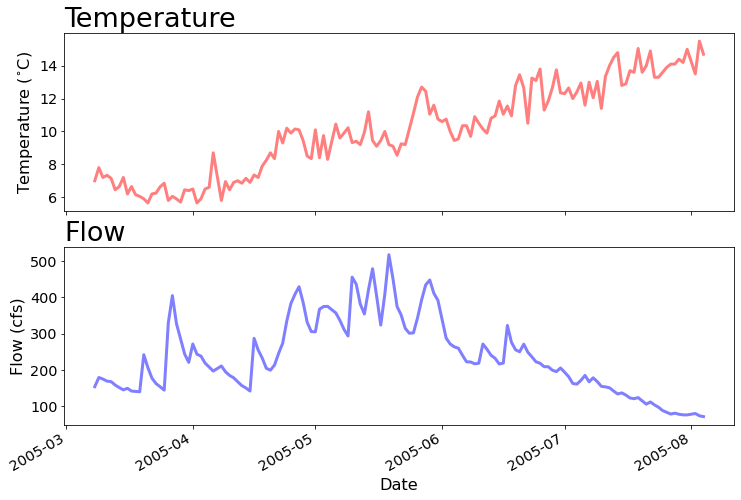

In [61]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [62]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2005_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2005_dungeness_all.csv")